# Random Forest (1)

Name: SAI AKHIL SN | Batch date: 27 Jan 2021

#### Problem Statement:
Apply random forest to know about the segment or attributes causes high sale. 

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('C://Users/oftog/Downloads/Company_Data.csv')

In [83]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [85]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [86]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [87]:
df=data.copy()

In [88]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [89]:
df.insert(11,'Sales_class'," ")

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i]<=7.5:
        df['Sales_class'].iloc[i]='Low'
    else:
        df['Sales_class'].iloc[i]='high'

C:\Users\Public\anacon\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [91]:
df.drop(['Sales'],axis=1,inplace=True)

In [92]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [93]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['Sales_class']= label_encoder.fit_transform(df['Sales_class'])

In [94]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


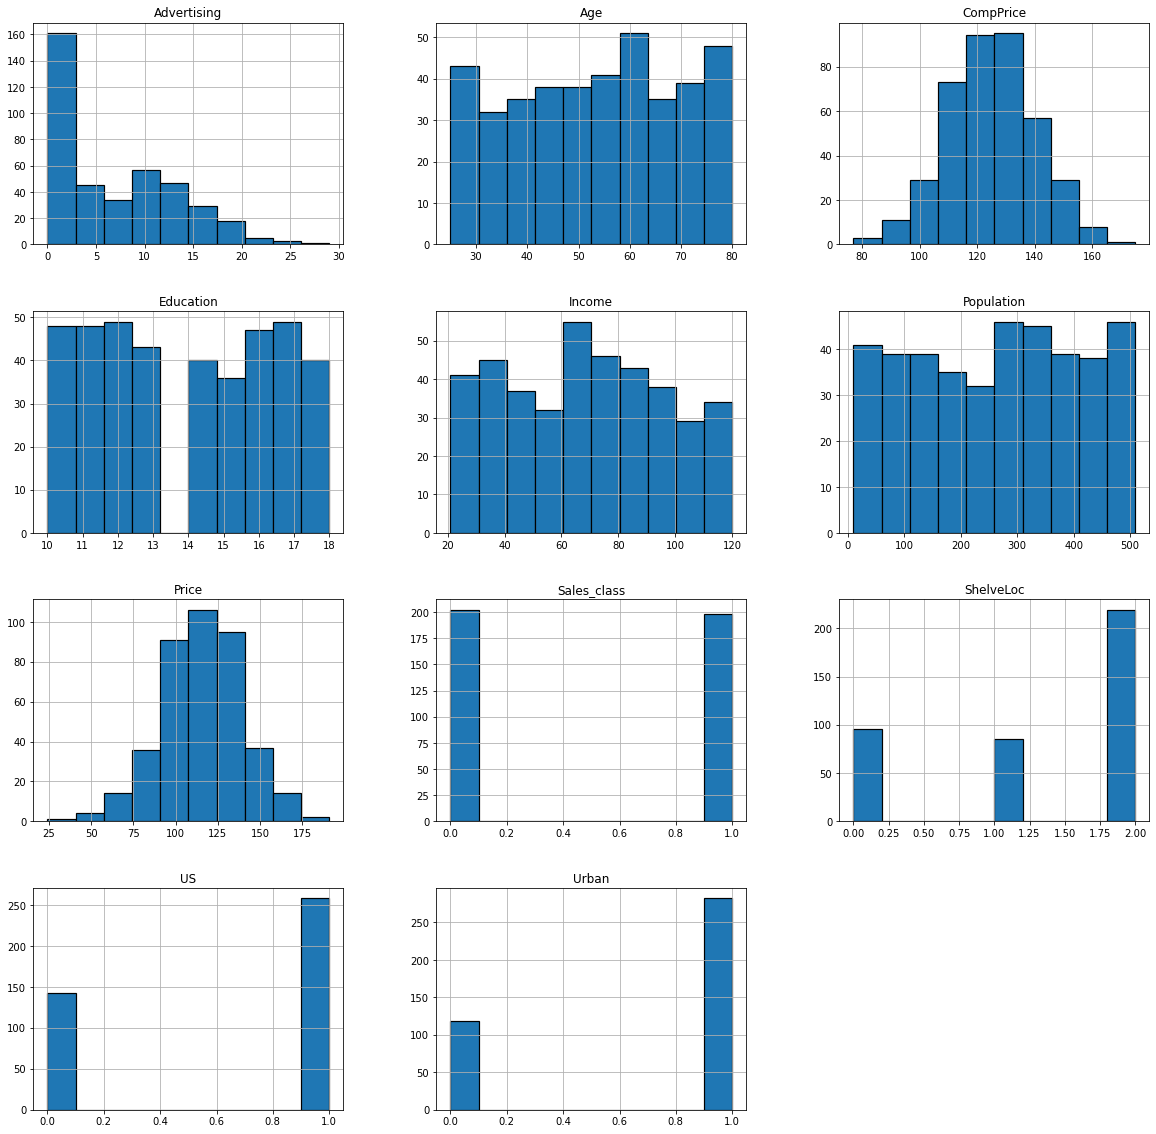

In [15]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [16]:
df.to_csv('auto.csv')

Shape of your Data Set: (400, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  8
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 36


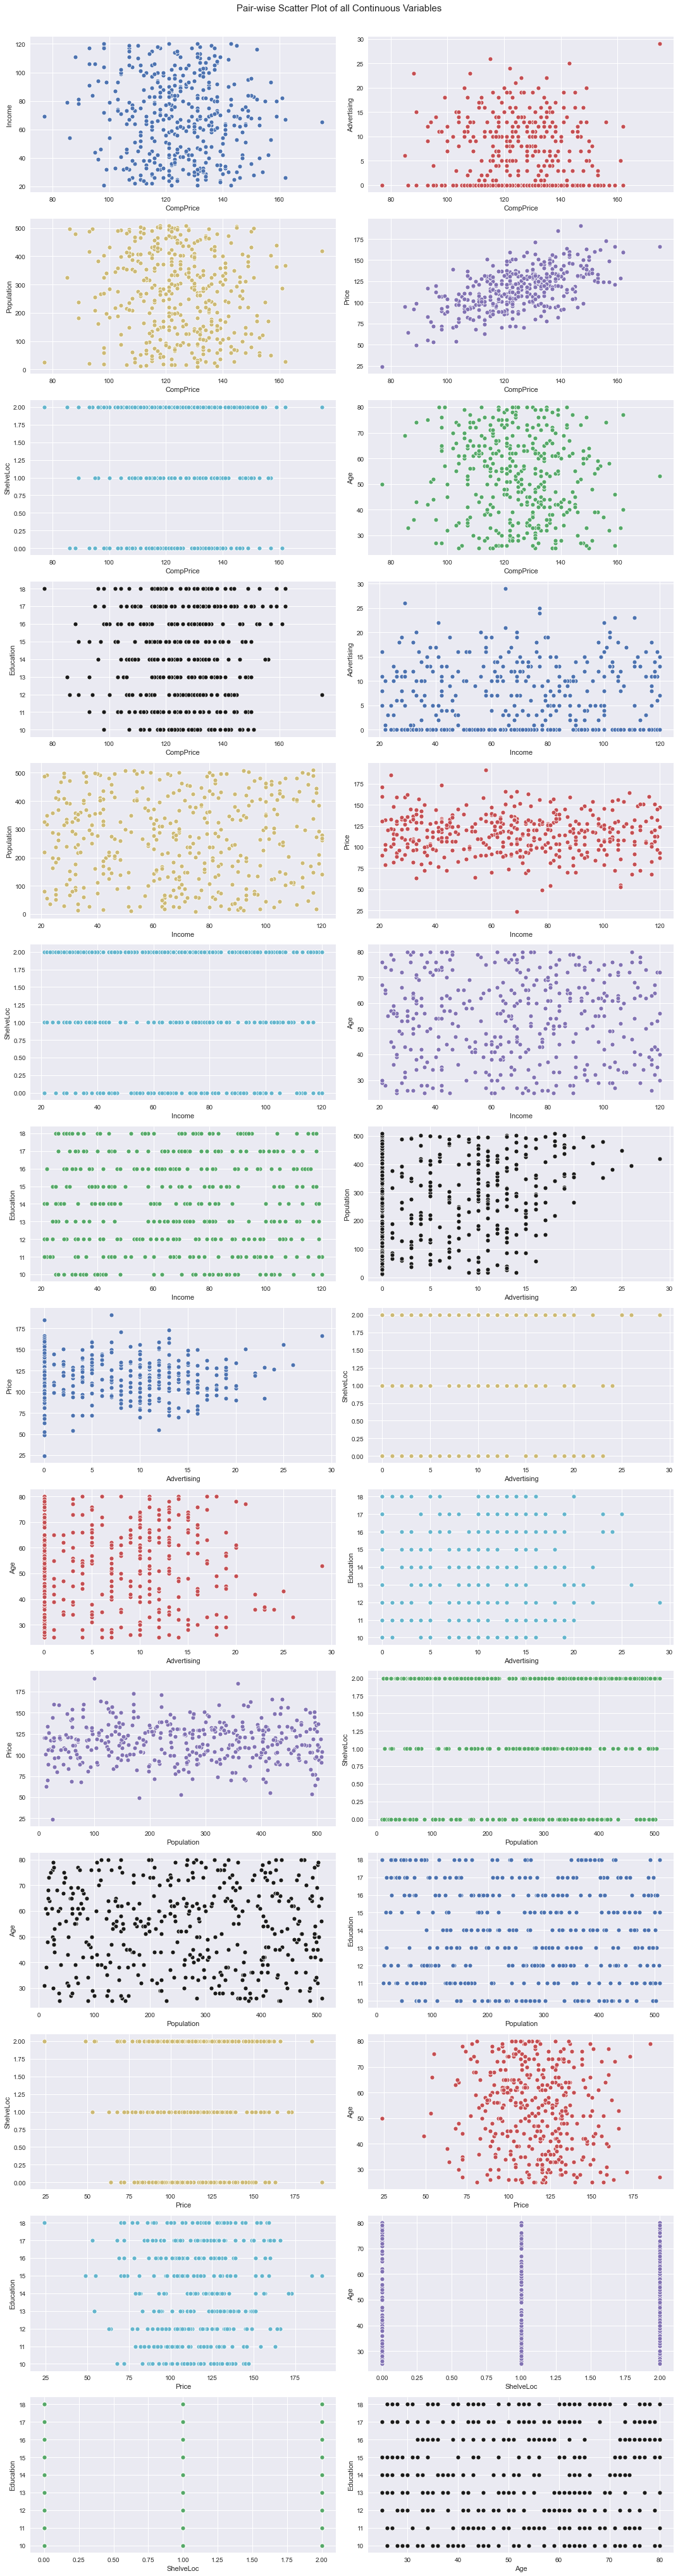

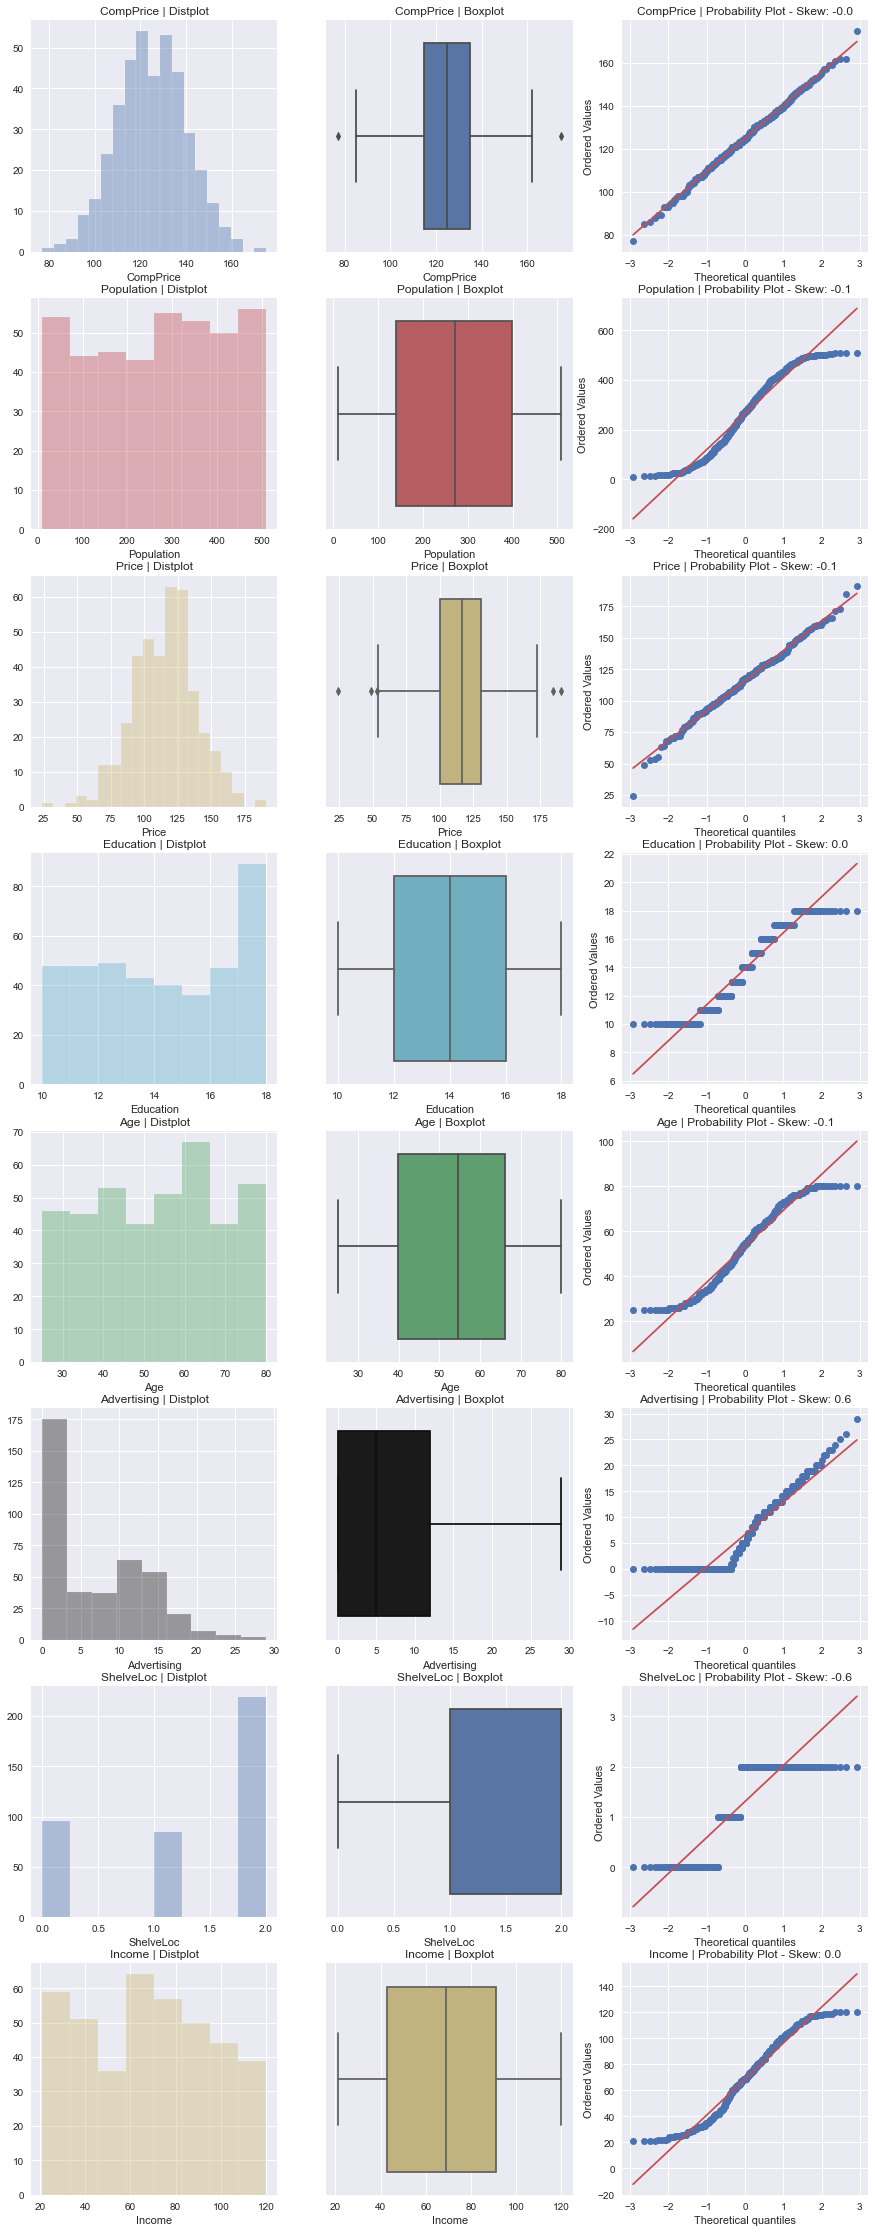

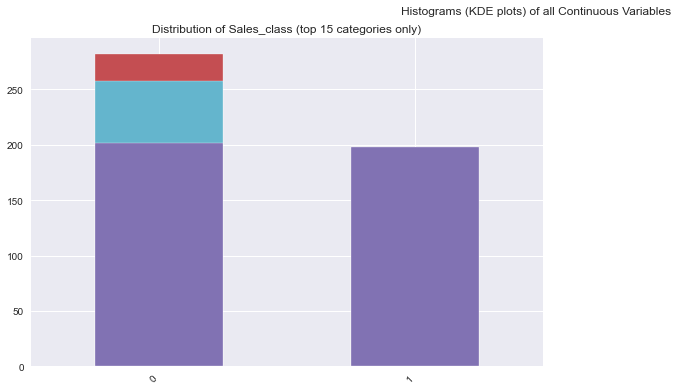

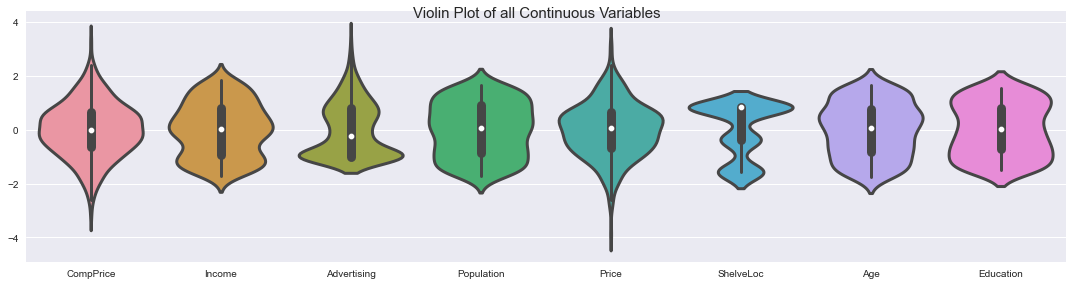

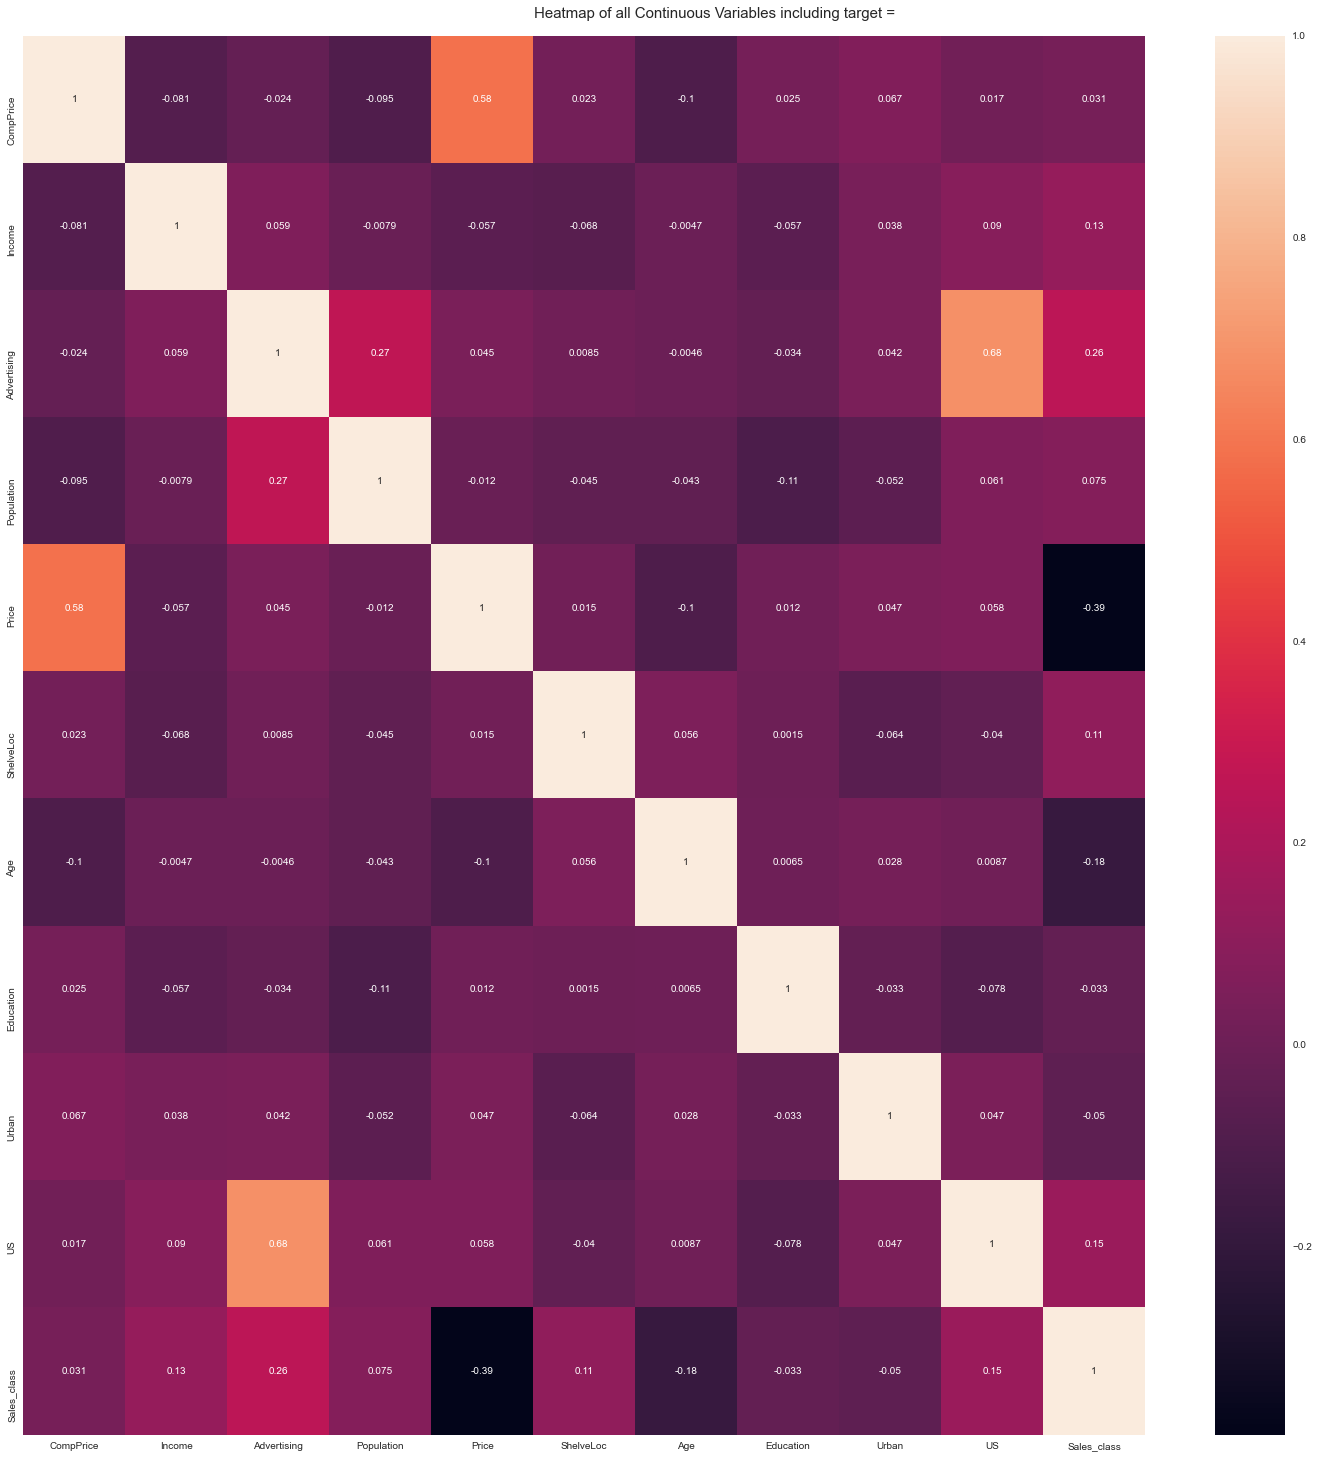

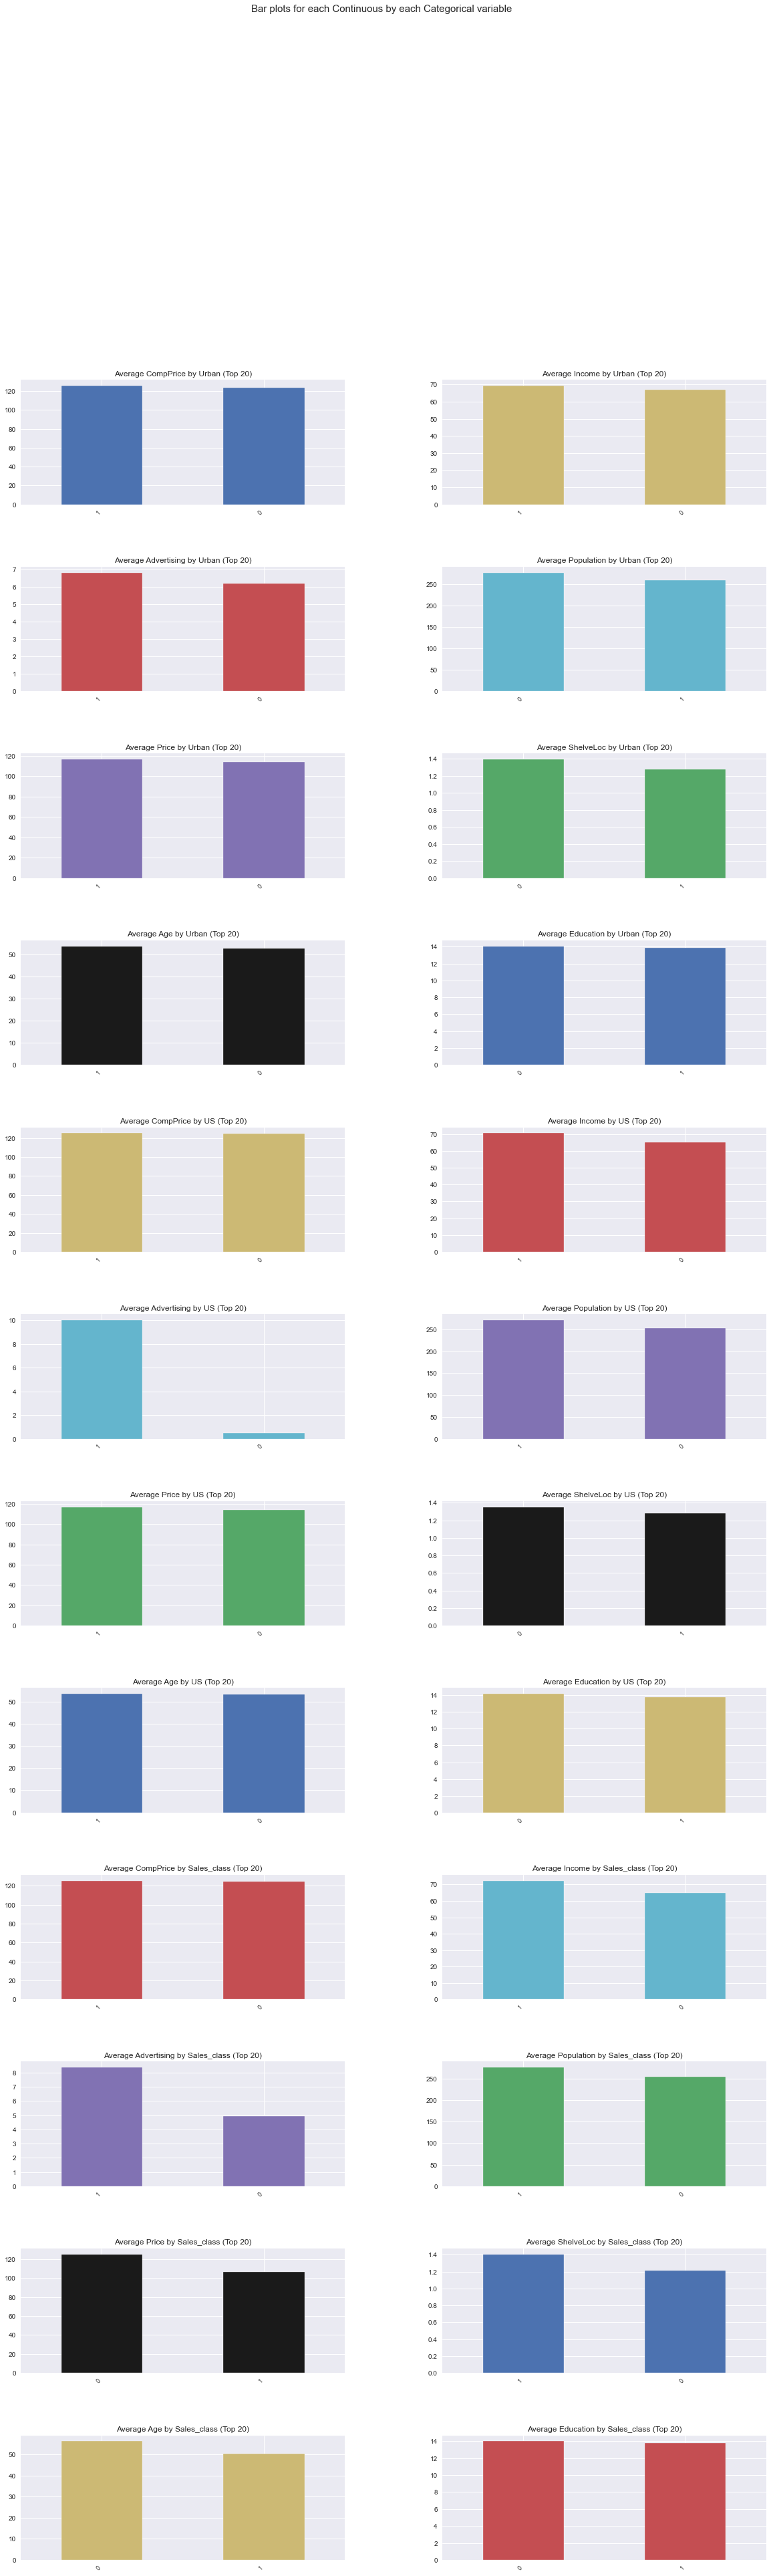

Time to run AutoViz (in seconds) = 25.342

 ###################### VISUALIZATION Completed ########################


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class 
AV=AutoViz_Class()


viz=AV.AutoViz('auto.csv')

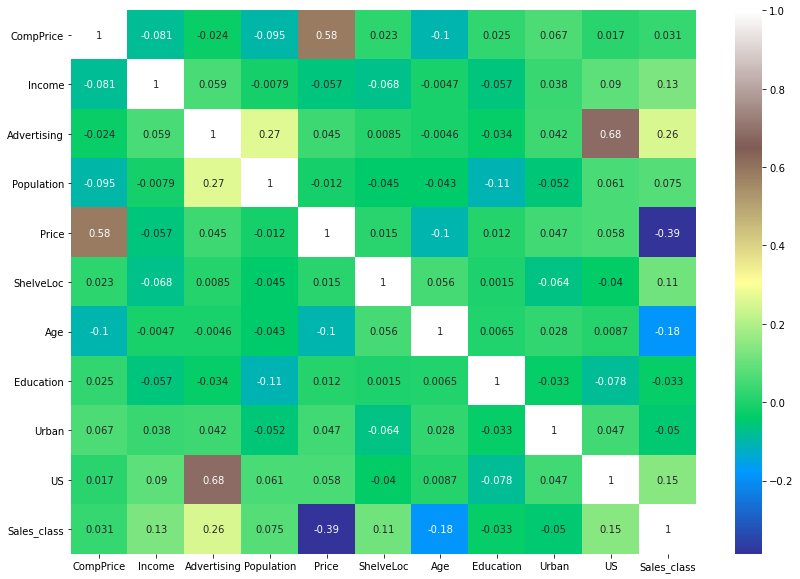

In [ ]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [95]:
pdata=df.copy()

In [96]:
x=pdata.iloc[:,0:-1]
y=pdata['Sales_class']

In [97]:
y.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

### Model Building using Random forest

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier 

In [22]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.8375


### Grid search optimisation

In [29]:
from sklearn.model_selection import GridSearchCV
gmodel=RandomForestClassifier()
param_grid=({'n_estimators':[100,200,300,400,500],'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)})
grid=GridSearchCV(gmodel,param_grid)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.8150000000000001
{'criterion': 'entropy', 'max_depth': 19, 'max_leaf_nodes': 19, 'n_estimators': 500}


In [75]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 19,max_leaf_nodes=19,n_estimators=500)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.945


In [78]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 19,max_leaf_nodes=19,n_estimators=500)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.94375


### Applying K fold cross validation

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10,random_state=7)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

C:\Users\Public\anacon\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8175000000000001


### Bagging 

In [26]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)

In [27]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8125


### Boosting

In [34]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

0.8325000000000001


### Voting Classifier

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(base_estimator=modelb1)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(base_estimator=modelb1)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)


[0.825 0.85  0.725 0.775 0.8   0.925 0.825 0.8   0.825 0.85 ]


In [54]:
print(results.mean())

0.8200000000000001


### XGBM

In [98]:
from tqdm.notebook import tqdm, trange
import time
# First XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [99]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]


In [108]:
y_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [60]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [59]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.00%


In [61]:
# evaluate predictions
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.12%


### LGBM

In [62]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)

In [68]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 19

In [69]:
clf = lgb.train(params, d_train, 100)

In [70]:
#Prediction
y_pred=clf.predict(x_test)

In [71]:
predictions = [round(value) for value in y_pred]

In [72]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7875

### Applying Recursive feature elimination (RFE)

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [31]:
RFE.predict

<function sklearn.feature_selection._rfe.RFE.predict(self, X)>

In [129]:
modelf=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
#final_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
a = [2,3,4,5,6,7,8,9,10,11,12] 
parameter = ({'n_features_to_select':a})
rfe = RFE(modelf)

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [124]:
gridRFE = GridSearchCV(rfe,parameter)
gridRFE.fit(x_train,y_train)
gridRFE.best_params_

{'n_features_to_select': 9}

In [131]:
a=RFE(final_model,9)

In [132]:
a.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                     criterion='entropy', max_depth=8,
                                     max_features=None, max_leaf_nodes=19,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=4, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     presort='deprecated', random_state=None,
                                     splitter='best'),
    n_features_to_select=9, step=1, verbose=0)

In [134]:
a.support_

array([ True,  True,  True,  True,  True,  True])

In [135]:
a.ranking_

array([1, 1, 1, 1, 1, 1])

In [117]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [118]:
rfe_df=df.copy()
rfe_df.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1


In [67]:
rfe_df.drop(['Population','Urban','US','Education'],axis=1,inplace=True)

In [68]:
rfe_df.head(2)

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Sales_class
0,138,73,11,120,0,42,1
1,111,48,16,83,1,65,1


In [69]:
rfe_df.Sales_class.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

In [70]:
x1=rfe_df.iloc[:,0:-1]
y1=rfe_df.iloc[:,-1]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.2,random_state=42)

In [73]:
#f_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
f_model=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
f_model.fit(x_train, y_train)
print(f_model.score(x_train, y_train))
print(f_model.score(x_test, y_test))

0.946875
0.825
